Imports.

In [114]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('data/UNdata.csv', encoding='latin-1')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17,25,26,27,28,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,...,Meeting,Results,Details,Notes,Votes.Counted,motion,Extra,Related.Documents,ident,resid
0,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1001
1,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1001
2,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1001
3,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1001
4,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1001


In [51]:
kept_cols = ['resid','vote','Country','Countryname',
             'year','session','importantvote']

df = df[kept_cols]
df.head()

,resid,vote,Country,Countryname,year,session,importantvote
0,1001,1,USA,United States of America,1946,1,0.0
1,1001,3,CAN,Canada,1946,1,0.0
2,1001,9,BHS,Bahamas,1946,1,0.0
3,1001,1,CUB,Cuba,1946,1,0.0
4,1001,1,HTI,Haiti,1946,1,0.0


We create a grid of `[0,0]` pairs to count same votes on an issue and issues both voted on, respectively.

In [94]:
grid = pd.DataFrame({c:[np.array([0,0]) for c in df['Country'].unique()]
                     for c in df['Country'].unique()})
grid.index = df['Country'].unique()

In [95]:
grid.head()

,USA,CAN,BHS,CUB,HTI,DOM,JAM,TTO,BRB,DMA,...,NRU,MHL,PLW,FSM,WSM,DEU,YEM,MNE,SRB,SCG
USA,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
CAN,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
BHS,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
CUB,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
HTI,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"


A yes vote is represented as 1; a no vote is represented as 3; abstentions, absents, and other non-votes are other numerics.

In [96]:
def same(i):
    return i+np.array([1,1])
def diff(i):
    return i+np.array([0,1])

In [97]:
for vote in df['resid'].unique():
    print(vote)
    tally = df.loc[df['resid']==vote, ['Country','vote']]
    yeses = list(tally.loc[tally['vote'] == 1, 'Country'])
    nos = list(tally.loc[tally['vote'] == 3, 'Country'])
    for c in yeses:
        grid.loc[c, yeses] = grid.loc[c, yeses].apply(same)
        grid.loc[c, nos] = grid.loc[c, nos].apply(diff)
    for c in nos:
        grid.loc[c, yeses] = grid.loc[c, yeses].apply(diff)
        grid.loc[c, nos] = grid.loc[c, nos].apply(same)

1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015


27083
27084
27085
27086
27087
27088
27089
27090
27091
27092
27093
27094
27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
27107
27108
27109
28001
28002
28003
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
28046
28047
28048
28049
28050
28051
28052
28053
28054
28055
28056
28057
28058
28059
28060
28061
28062
28063
28064
28065
28066
28067
28068
28069
28070
28071
28072
28073
28074
28075
28076
28077
28078
28079
28080
28081
28082
28083
28084
28085
28086
28087
28088
28089
28090
28091
28092
28093
28094
29001
29002
29003
29004
29005
29006
29007
29008
29009
29010
29011
29012
29013
29014
29015
29016
29017
29018
29019
29020
29021
29022
29023
29024
29025
29026
29027
29028
29029
29030
29031
29032
29033
29034
29035
29036
29037
29038
29039
29040
29041
29042
29043
29044
29045
2904

39112
39113
39114
39115
39116
39117
39118
39119
39120
39121
39122
39123
39124
39125
39126
39127
39128
39129
39130
39131
39132
39133
39134
39135
39136
39137
39138
39139
39140
39141
39142
39143
39144
39145
39146
39147
39148
39149
39150
39151
40001
40002
40003
40004
40005
40006
40007
40008
40009
40010
40011
40012
40013
40014
40015
40016
40017
40018
40019
40020
40021
40022
40023
40024
40025
40026
40027
40028
40029
40030
40031
40032
40033
40034
40035
40036
40037
40038
40039
40040
40041
40042
40043
40044
40045
40046
40047
40048
40049
40050
40051
40052
40053
40054
40055
40056
40057
40058
40059
40060
40061
40062
40063
40064
40065
40066
40067
40068
40069
40070
40071
40072
40073
40074
40075
40076
40077
40078
40079
40080
40081
40082
40083
40084
40085
40086
40087
40088
40089
40090
40091
40092
40093
40094
40095
40096
40097
40098
40099
40100
40101
40102
40103
40104
40105
40106
40107
40108
40109
40110
40111
40112
40113
40114
40115
40116
40117
40118
40119
40120
40121
40122
40123
40124
40125
40126
4012

53024
53025
53026
53027
53028
53029
53030
53031
53032
53033
53034
53035
53036
53037
53038
53039
53040
53041
53042
53043
53044
53045
53046
53047
53048
53049
53050
53051
53052
53053
53054
53055
53056
53057
53058
53059
53060
53061
54001
54002
54003
54004
54005
54006
54007
54008
54009
54010
54011
54012
54013
54014
54015
54016
54017
54018
54019
54020
54021
54022
54023
54024
54025
54026
54027
54028
54029
54030
54031
54032
54033
54034
54035
54036
54037
54038
54039
54040
54041
54042
54043
54044
54045
54046
54047
54048
54049
54050
54051
54052
54053
54054
54055
54056
54057
54058
54059
54060
54061
54062
54063
54064
54065
54066
54067
54068
55001
55002
55003
55004
55005
55006
55007
55008
55009
55010
55011
55012
55013
55014
55015
55016
55017
55018
55019
55020
55021
55022
55023
55024
55025
55026
55027
55028
55029
55030
55031
55032
55033
55034
55035
55036
55037
55038
55039
55040
55041
55042
55043
55044
55045
55046
55047
55048
55049
55050
55051
55052
55053
55054
55055
55056
55057
55058
55059
55060
5506

72029
72030
72031
72032
72033
72034
72035
72036
72037
72038
72039
72040
72041
72042
72043
72044
72045
72046
72047
72048
72049
72050
72051
72052
72053
72054
72055
72056
72057
72058
72059
72060
72061
72062
72063
72064
72065
72066
72067
72068
72069
72070
72071
72072
72073
72074
72075
72076
72077
72078
72079
72080
72081
72082
72083
72084
72085
72086
72087
72088
72089
72090
54069
54070
54071
54072
54073
54074
54075
54076
54077
54078
54079
54080
54081
54082
54083
54084
54085
54086
54087
54088
54089
54090
54091
54092
54093
55068
55069
55070
55071
55072
55073
55074
55075
55076
55077
56068
56069
56070
56071
56072
56073
56074
56075
56076
56077
56078
56079
56080
56081
56082
56083
56084
57074
57075
57076
57077
57078
57079
57080
57081
57082
57083
57084
57085
57086
57087
57088
57089
57090
57091
57092
57093
57094
57095
57096
57097
57098
57099
57100
57101
57102
57103
57104
58077
58078
58079
58080
58081
58082
58083
58084
58085
58086
58087
58088
58089
58090
58091
58092
58093
59072
59073
59074
59075
5907

In [111]:
gridc = grid.copy()

In [122]:
for i in grid.index:
    for c in grid.columns:
        if grid.loc[i,c][1] == 0:
            grid.loc[i,c] = np.nan
        else:
            grid.loc[i,c] = np.float(grid.loc[i,c][0] / grid.loc[i,c][1])

In [123]:
grid

,USA,CAN,BHS,CUB,HTI,DOM,JAM,TTO,BRB,DMA,...,NRU,MHL,PLW,FSM,WSM,DEU,YEM,MNE,SRB,SCG
USA,1,0.774371,0.304724,0.238348,0.420483,0.450489,0.330045,0.31878,0.323948,0.277697,...,0.514644,0.728734,0.828713,0.811616,0.3446,0.595211,0.208864,0.578645,0.6625,0.466667
CAN,0.774371,1,0.746924,0.591486,0.752862,0.762404,0.743227,0.731772,0.737155,0.699922,...,0.785294,0.871636,0.851813,0.904141,0.795338,0.936047,0.637493,0.857612,0.896825,1
BHS,0.304724,0.746924,1,0.946702,0.995877,0.99327,0.997808,0.999455,0.997525,0.994849,...,0.764706,0.672402,0.526741,0.613534,0.987789,0.792442,0.981799,0.814534,0.930894,0.866667
CUB,0.238348,0.591486,0.946702,1,0.896543,0.879882,0.936792,0.941412,0.928288,0.944406,...,0.656738,0.526125,0.37037,0.438596,0.919338,0.681845,0.98322,0.700935,0.85514,0.815789
HTI,0.420483,0.752862,0.995877,0.896543,1,0.971162,0.986192,0.98597,0.986732,0.988701,...,0.794745,0.689759,0.529048,0.650477,0.988126,0.798893,0.98078,0.8318,0.939535,0.931034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEU,0.595211,0.936047,0.792442,0.681845,0.798893,0.789216,0.789559,0.783889,0.78392,0.747989,...,0.647321,0.763623,0.700322,0.793839,0.845169,1,0.738554,0.995842,0.937255,1
YEM,0.208864,0.637493,0.981799,0.98322,0.98078,0.965762,0.987431,0.987565,0.987254,0.985593,...,0.690202,0.59188,0.424044,0.505394,0.945713,0.738554,1,0.758333,0.840796,0.694444
MNE,0.578645,0.857612,0.814534,0.700935,0.8318,0.820928,0.810664,0.807037,0.805011,0.761993,...,0.556931,0.737467,0.71648,0.753482,0.855825,0.995842,0.758333,1,0.948819,NaN
SRB,0.6625,0.896825,0.930894,0.85514,0.939535,0.947791,0.942387,0.943478,0.924686,0.912409,...,0.684932,0.851648,0.906832,0.864706,0.938596,0.937255,0.840796,0.948819,1,NaN


In [127]:
grid = grid.astype(float)

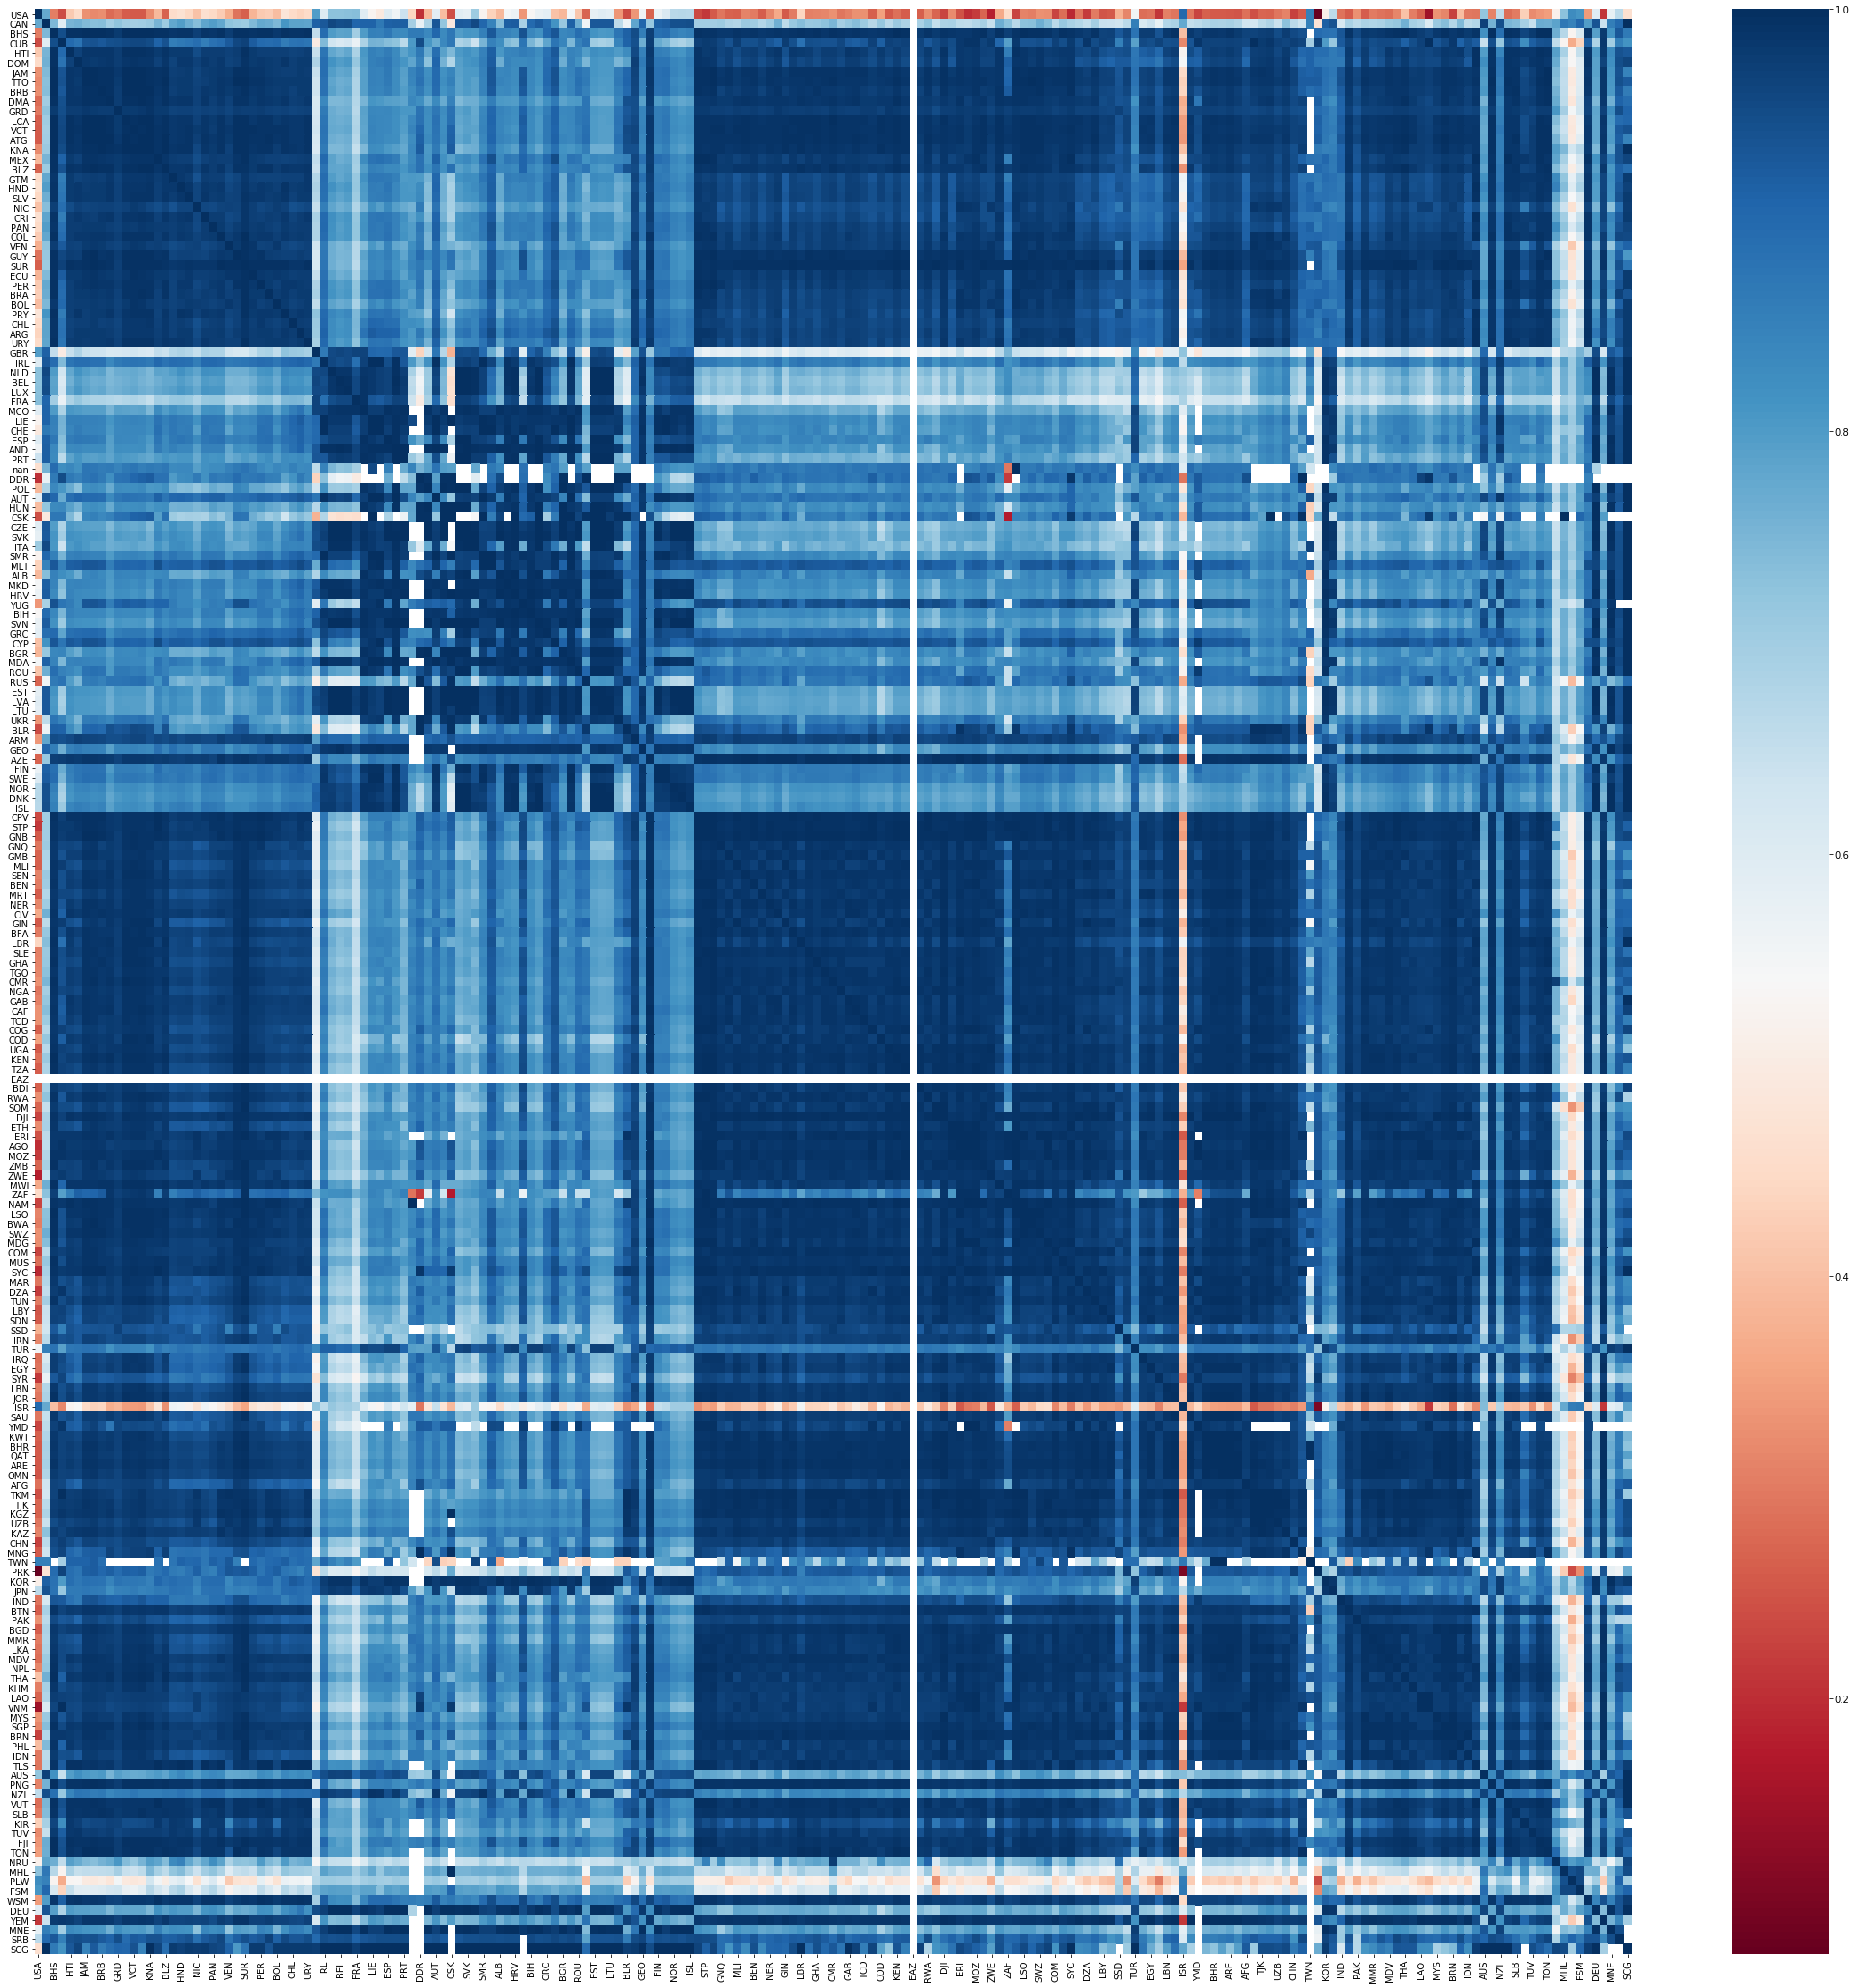

In [131]:
plt.figure(figsize=(40,40))
sns.heatmap(data=grid, cmap='RdBu')

That doesn't give a clear picture at all! We need to visualize this graphically.